In [1]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [2]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', ['id', 'abstract', 'categories', 'comments'])

In [3]:
# 使用正则表达式匹配，XX pages
data['pages'] = data['comments'].apply(lambda x: re.findall('[1-9][0-9]* pages', str(x)))

In [4]:
data.head()


,abstract,categories,comments,id,pages
0,A fully differential calculation in perturba...,hep-ph,"37 pages, 15 figures; published version",0704.0001,[37 pages]
1,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,To appear in Graphs and Combinatorics,0704.0002,[]
2,The evolution of Earth-Moon system is descri...,physics.gen-ph,"23 pages, 3 figures",0704.0003,[23 pages]
3,We show that a determinant of Stirling cycle...,math.CO,11 pages,0704.0004,[11 pages]
4,In this paper we show how to compute the $\L...,math.CA math.FA,None,0704.0005,[]


In [5]:
# 筛选出有pages的论文
data = data[data['pages'].apply(len) > 0]

In [6]:
data.head()

,abstract,categories,comments,id,pages
0,A fully differential calculation in perturba...,hep-ph,"37 pages, 15 figures; published version",0704.0001,[37 pages]
2,The evolution of Earth-Moon system is descri...,physics.gen-ph,"23 pages, 3 figures",0704.0003,[23 pages]
3,We show that a determinant of Stirling cycle...,math.CO,11 pages,0704.0004,[11 pages]
5,We study the two-particle wave function of p...,cond-mat.mes-hall,"6 pages, 4 figures, accepted by PRA",0704.0006,[6 pages]
6,A rather non-standard quantum representation...,gr-qc,"16 pages, no figures. Typos corrected to match...",0704.0007,[16 pages]


In [7]:
data['pages'] = data['pages'].apply(lambda x: int(x[0].replace(' pages', '')))

In [8]:
data['pages'].describe().astype(int)

count    1089180
mean          17
std           22
min            1
25%            8
50%           13
75%           22
max        11232
Name: pages, dtype: int32

In [9]:
# 选择主要类别
data['categories'] = data['categories'].apply(lambda x: x.split(' ')[0])
data['categories'] = data['categories'].apply(lambda x: x.split('.')[0])
data['categories']

0            hep-ph
2           physics
3              math
5          cond-mat
6             gr-qc
9              math
10             math
13             math
14           hep-th
15           hep-ph
16         astro-ph
17           hep-th
18             math
19           hep-ex
20             nlin
21             math
22         astro-ph
24         cond-mat
26         cond-mat
27             math
29         cond-mat
30           hep-ph
31           hep-ph
32          physics
33            q-bio
34          physics
35            q-bio
36          physics
37          physics
38           hep-ph
             ...   
1796873    supr-con
1796876    supr-con
1796877    supr-con
1796878    supr-con
1796879    supr-con
1796880    supr-con
1796881    supr-con
1796882    supr-con
1796883    supr-con
1796885    supr-con
1796886    supr-con
1796887    supr-con
1796888    supr-con
1796890    supr-con
1796891    supr-con
1796894    supr-con
1796897    supr-con
1796898    supr-con
1796899    supr-con


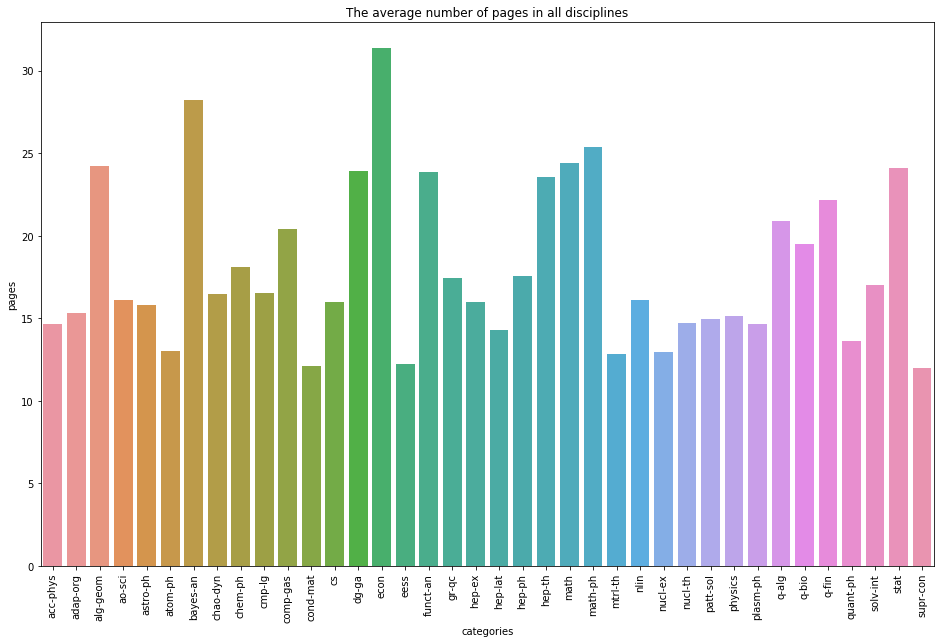

In [10]:
# data.groupby(['categories'])['pages'].mean()
data_pages_mean = data.groupby(['categories']).agg({'pages':'mean'}).reset_index()
plt.figure(figsize=(16, 10))
# data_figures_mean = data.groupby(['categories'])['figures'].mean().reset_index()
sns.barplot(x=data_pages_mean['categories'], y=data_pages_mean['pages'],data=data_pages_mean,)
plt.title('The average number of pages in all disciplines') 
plt.xticks(rotation=90)
plt.show()

In [11]:
data['figures'] = data['comments'].apply(lambda x: re.findall('[1-9][0-9]* figures', str(x)))
data = data[data['figures'].apply(len) > 0]
#data.loc[data['figures']> 0)] # 等价于上一句
data['figures'] = data['figures'].apply(lambda x: float(x[0].replace(' figures', '')))

In [12]:
data

,abstract,categories,comments,id,pages,figures
0,A fully differential calculation in perturba...,hep-ph,"37 pages, 15 figures; published version",0704.0001,37,15.0
2,The evolution of Earth-Moon system is descri...,physics,"23 pages, 3 figures",0704.0003,23,3.0
5,We study the two-particle wave function of p...,cond-mat,"6 pages, 4 figures, accepted by PRA",0704.0006,6,4.0
9,Partial cubes are isometric subgraphs of hyp...,math,"36 pages, 17 figures",0704.0010,36,17.0
15,"In this work, we evaluate the lifetimes of t...",hep-ph,"17 pages, 3 figures and 1 table",0704.0016,17,3.0
16,Results from spectroscopic observations of t...,astro-ph,"10 pages, 11 figures (figures 3, 4, 7 and 8 at...",0704.0017,10,11.0
20,Spatiotemporal pattern formation in a produc...,nlin,"5 pages, 4 figures",0704.0021,5,4.0
21,We present Lie group integrators for nonline...,math,"20 pages, 4 figures",0704.0022,20,4.0
22,"The very nature of the solar chromosphere, i...",astro-ph,"4 pages, 2 figures, to appear in the proceedin...",0704.0023,4,2.0
24,We present recent advances in understanding ...,cond-mat,"41 pages, 13 figures, in ""Polarons in Advanced...",0704.0025,41,13.0


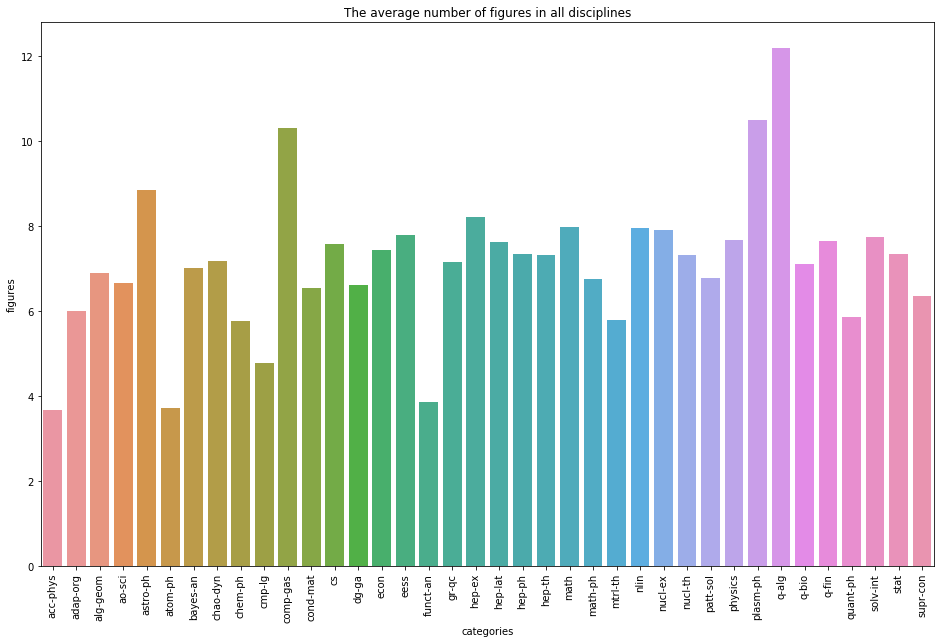

In [14]:
# 每类论文的平均图片数
plt.figure(figsize=(16, 10))
data_figures_mean = data.groupby(['categories'])['figures'].mean().reset_index()
sns.barplot(x=data_figures_mean['categories'], y=data_figures_mean['figures'],data=data_figures_mean)
plt.title('The average number of figures in all disciplines')
plt.xticks(rotation=90)
plt.show()